# EDA of Pizaa Data

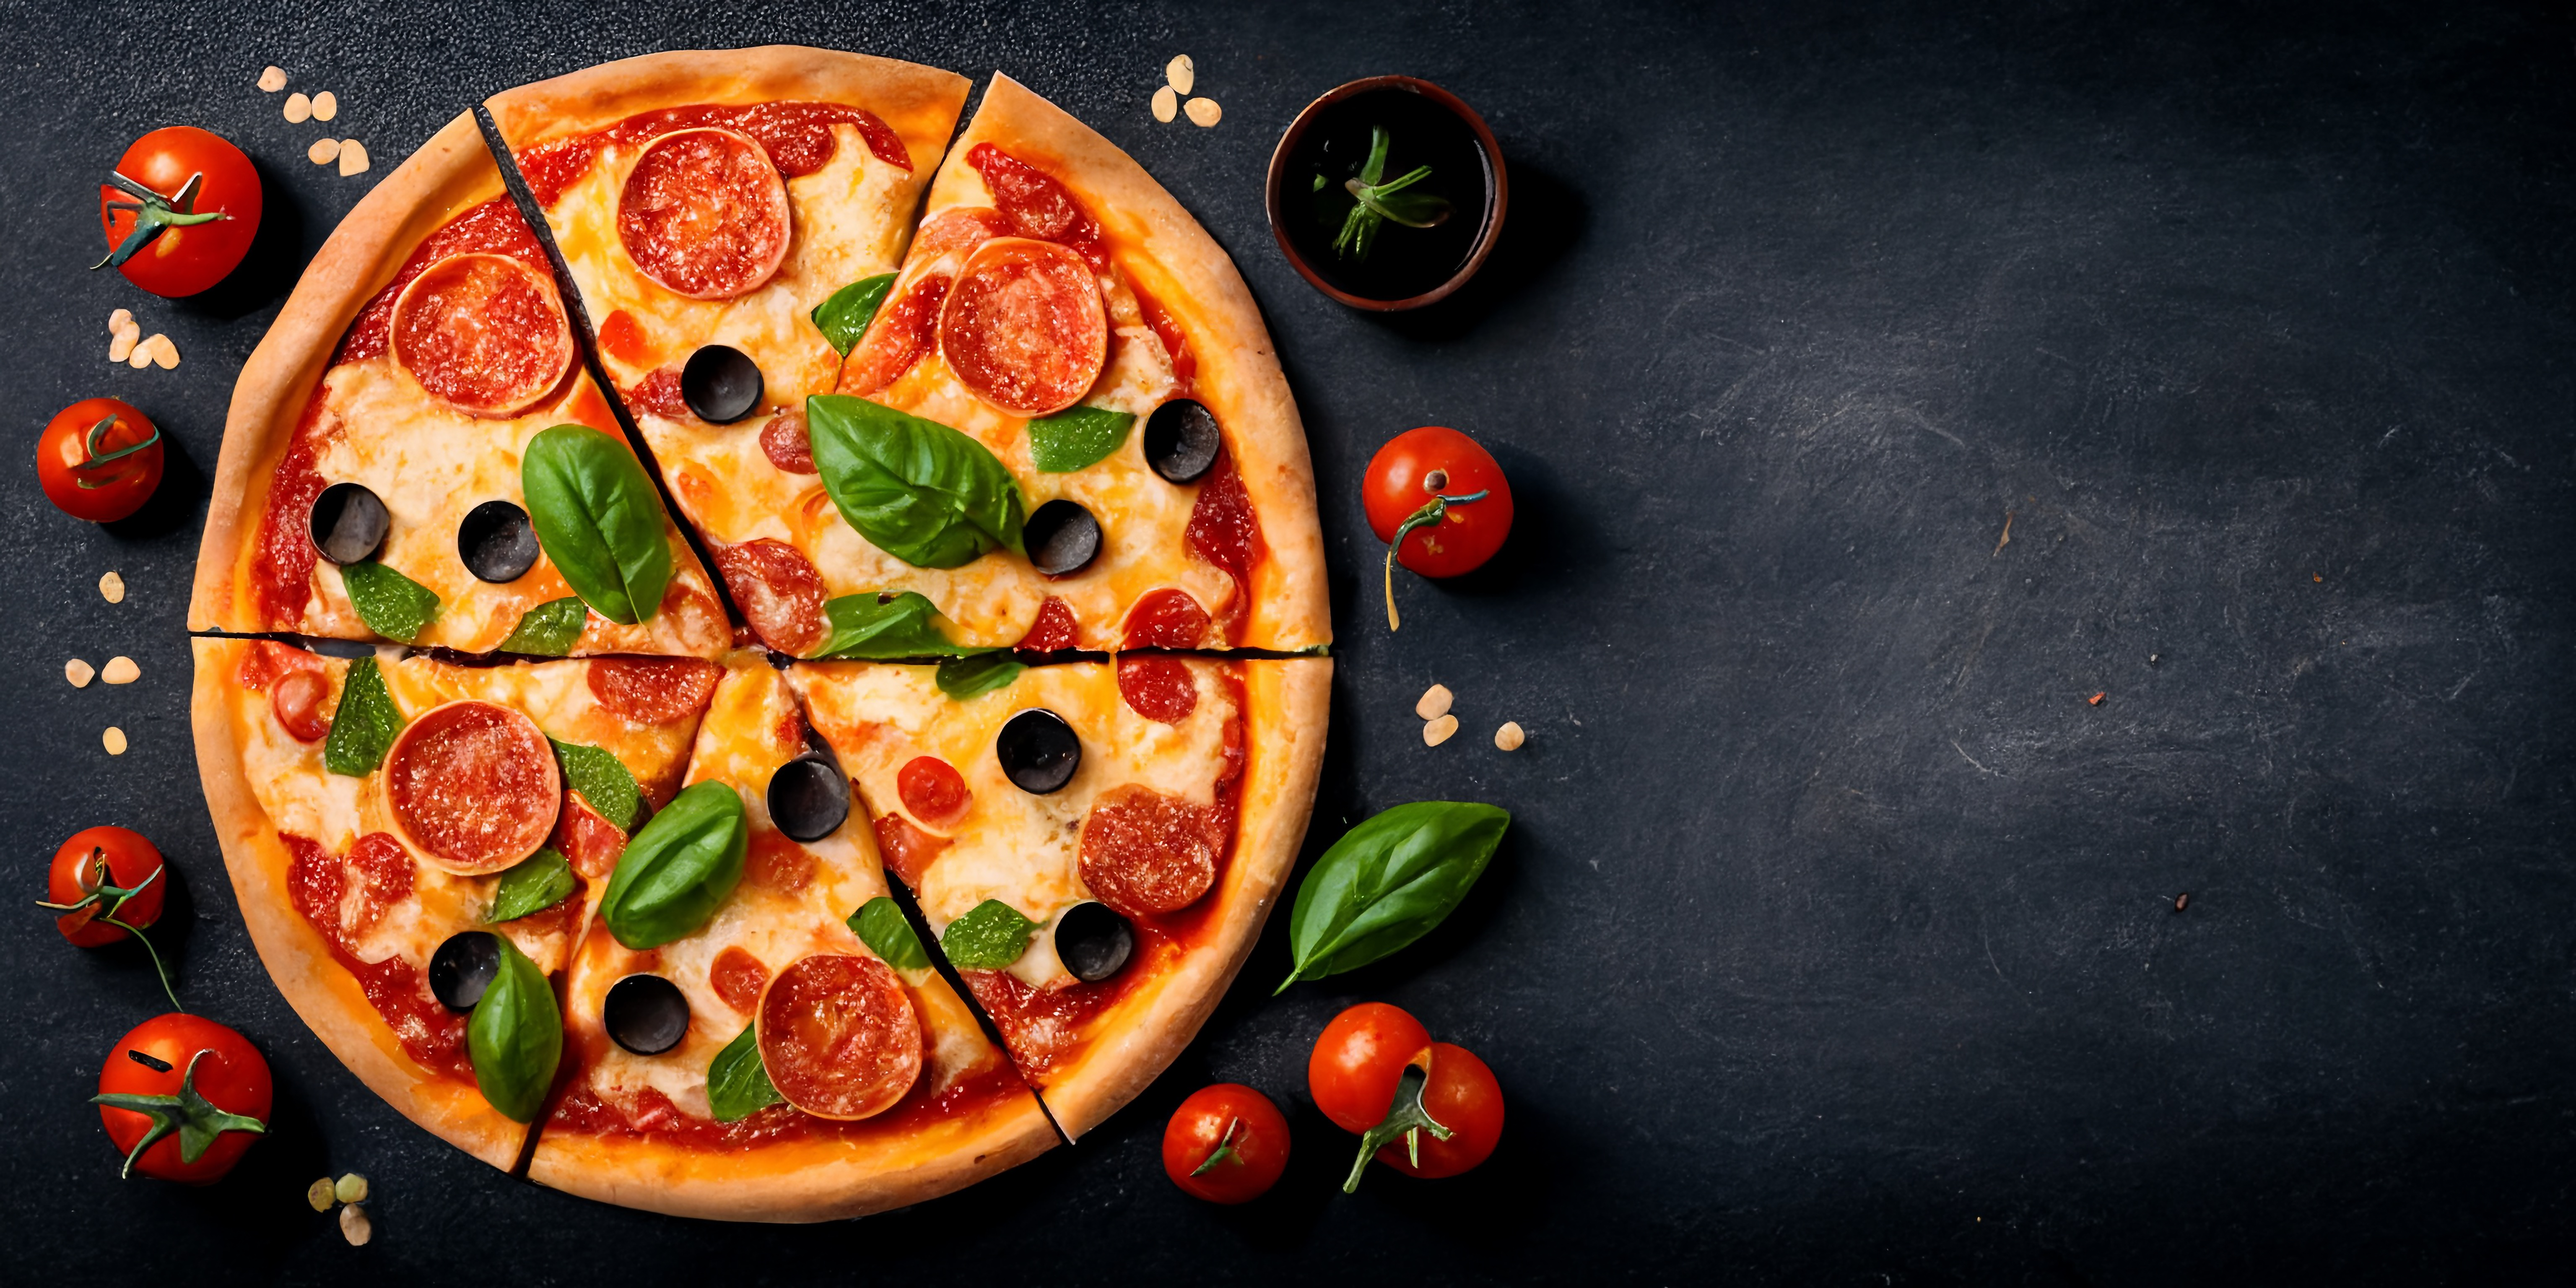

We are having dataset of Pizza Sales from a Resturant. Dataset has been downloaded form Kaggle. Through this notebook we will try to address following questions.
- What days and times do we tend to be busiest?
- How many pizzas are we making during peak periods?
- What are our best and worst-selling pizzas?
- What's our average order value?
- How well are we utilizing our seating capacity?

In [ ]:
#Lets import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
pizza_dt=pd.read_csv("/content/pizza_sales.csv")
pizza_dt.tail(2)

pizza_id  order_id pizza_name_id  quantity  order_date order_time  \
48618   48619.0   21349.0    mexicana_l       1.0  31-12-2015   22:09:54   
48619   48620.0   21350.0     bbq_ckn_s       1.0  31-12-2015   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
48618       20.25        20.25          L         Veggie   
48619       12.75        12.75          S        Chicken   

                                                                                 pizza_ingredients  \
48618  Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic   
48619          Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce   

                       pizza_name  
48618          The Mexicana Pizza  
48619  The Barbecue Chicken Pizza

In [ ]:
pizza_dt.shape

(48620, 12)

This dataset contain detailed information about pizza orders, including specifics about the pizza variants, quantities, pricing, dates, times, and categorization details.

- pizza_id: A unique identifier assigned to each distinct pizza variant available for ordering.
- order_id: A unique identifier for each order made, which links to multiple pizzas.
- pizza_name_id: An identifier linking to a specific name of the pizza.
- quantity: The number of units of a specific pizza variant ordered within an order.
- order_date: The date when the order was placed.
- order_time: The time when the order was placed.
- unit_price: The cost of a single unit of the specific pizza variant.
- total_price: The aggregated cost of all units of a specific pizza variant in an order.
- pizza_size: Represents the size of the pizza (e.g., small, medium, large).
- pizza_category: Indicates the category of the pizza, such as vegetarian, non-vegetarian, etc.
- pizza_ingredients: Provides a list or description of the ingredients used in the pizza.
- pizza_name: Specifies the name of the specific pizza variant ordered.

In [ ]:
pizza_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


There is no null values in any of the features. There are few text and data features for which we might have to change data type

In [ ]:
pizza_dt.describe()

pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000

Let us check no. of unique value and there frequency in data for all the features

In [ ]:
cols=pizza_dt.columns

In [ ]:
for col in cols:
  print("Distribution of feature %s is:" % col)
  print(pizza_dt[col].value_counts().head())
  print(" ")
  print("No. of unique enteries are", pizza_dt[col].value_counts().shape[0])
  print("***************************************************")
  print(" ")

Distribution of feature pizza_id is:
1.0        1
32418.0    1
32409.0    1
32410.0    1
32411.0    1
Name: pizza_id, dtype: int64
 
No. of unique enteries are 48620
***************************************************
 
Distribution of feature order_id is:
18845.0    21
10760.0    21
18280.0    15
21158.0    15
17464.0    15
Name: order_id, dtype: int64
 
No. of unique enteries are 21350
***************************************************
 
Distribution of feature pizza_name_id is:
big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
Name: pizza_name_id, dtype: int64
 
No. of unique enteries are 91
***************************************************
 
Distribution of feature quantity is:
1.0    47693
2.0      903
3.0       21
4.0        3
Name: quantity, dtype: int64
 
No. of unique enteries are 4
***************************************************
 
Distribution of feature order_date is:
26-11-2015    261
27-11-2015    259
15-10

Observations:
1. No. of orders made are 21,350
2. As many as 21 and 15 pizzas of different type have been ordered in one order
3. Maximum quantity of a single type of pizza ordered in single order is 4, however agaisnt majority of orders single pizza has been orders of a particular type.
4. Seems like data in order_date features requires treatent due to use of different type of seperators
5. Max. and Min. price of pizza is 35.75 and 9.75 dollars. Pizzas orders max times is having unit price of aound 20.75 dollars
5. Max pizza size of orders is Large
6. Pizza_category are of Classic type
7. There are 32 types of pizzas on offering
8. The Classic Deluxe Pizza is ordered max no. of times

In [ ]:
pizza_dt["order_date"].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: order_date, dtype: object

In [ ]:
#Lets treat date feature
pizza_dt["order_date"]=pizza_dt["order_date"].apply(lambda x : str(x).replace("-","/"))

In [ ]:
pizza_dt["order_date"].value_counts().head()

26/11/2015    261
27/11/2015    259
15/10/2015    258
4/7/2015      233
3/7/2015      207
Name: order_date, dtype: int64

In [ ]:
pizza_dt.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
cols=pizza_dt.select_dtypes("float64","int64").columns

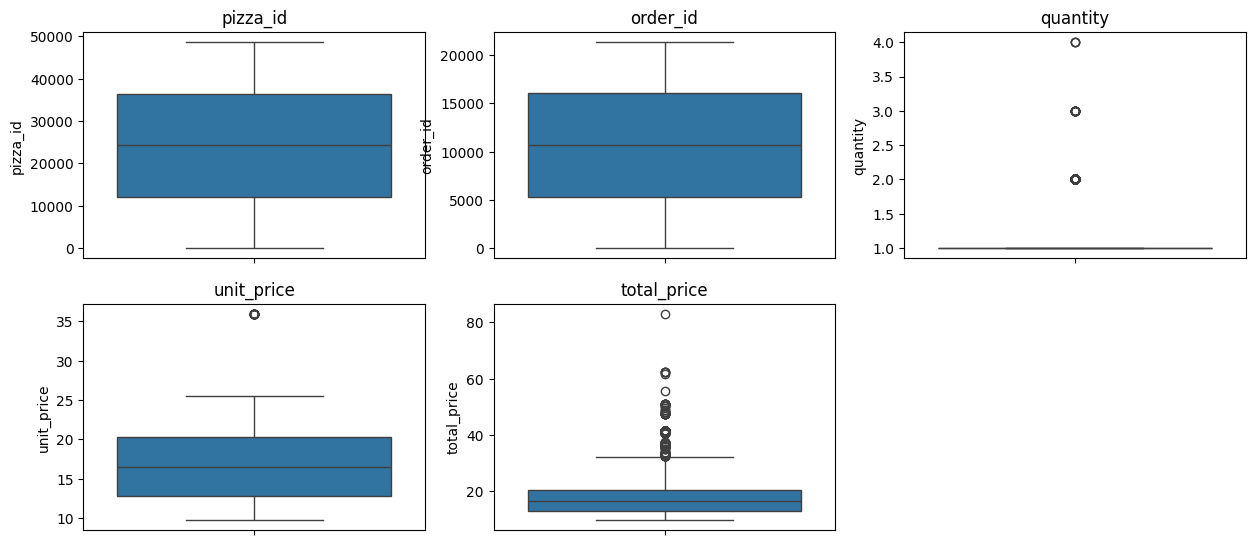

In [ ]:
plt.subplots(figsize=(15,10))
i=1
for col in cols:
  plt.subplot(int(len(cols)/2)+1,3,i)
  sns.boxplot(pizza_dt[col])
  plt.title(col)
  i+=1

Dropping `pizza_id` as it is having all the unique enteries.             

In [ ]:
 pizza_dt=pizza_dt.drop(["pizza_id"], axis=1)

In [ ]:
pizza_dt.order_id.value_counts().shape[0]


21350

There are 21350 no. of orders made in the data

In [ ]:
pizza_name_id=pizza_dt.pizza_name_id.value_counts()
pizza_name_id.head()

big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
Name: pizza_name_id, dtype: int64

In [ ]:
pizza_name_id.shape

(91,)

In [ ]:
pizza_dt[pizza_dt.pizza_name_id =='big_meat_s'].head(2)

order_id pizza_name_id  quantity order_date order_time  unit_price  \
35      15.0    big_meat_s       1.0   1/1/2015   13:33:00        12.0   
55      20.0    big_meat_s       1.0   1/1/2015   14:03:08        12.0   

    total_price pizza_size pizza_category  \
35         12.0          S        Classic   
55         12.0          S        Classic   

                                     pizza_ingredients          pizza_name  
35  Bacon, Pepperoni, Italian Sausage, Chorizo Sausage  The Big Meat Pizza  
55  Bacon, Pepperoni, Italian Sausage, Chorizo Sausage  The Big Meat Pizza

pizza_name_id seems to capture information regarding differnet combination of pizzas based on size of pizza and name of pizza.
The Big Meat Pizza with size small is the highest ordered pizza among all the pizza sizes


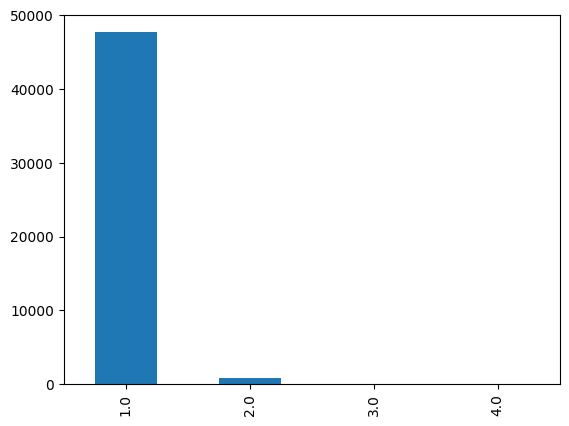

In [ ]:
pizza_dt.quantity.value_counts().plot.bar()
plt.show()

Majority of orders of pizzas are for only single quantity for a particular type of pizza

In [ ]:
pizza_dt['order_date'].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: order_date, dtype: object

In [ ]:
pizza_dt.order_date.min(),pizza_dt.order_date.max()

('1/1/2015', '9/9/2015')

Thus data is for calender year 2015

In [ ]:
pizza_dt['order_date']=pd.to_datetime(pizza_dt['order_date']).dt.date

In [ ]:
pizza_dt.order_date.value_counts().head()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-04-07    233
2015-03-07    207
Name: order_date, dtype: int64

Seems like Maximum orders in year have been made on 26th and 27th of November i.e. probably on  eve of Thanksgiving day and on Thanksgiving.
However nos. above are one side of the story as contains multiple line items against single order. We have to dig deeper to get exact no. of orders on a particular date

In [ ]:
daily_orders= pizza_dt.groupby(["order_date","order_id"]).order_id.count()
daily_orders.head()

order_date  order_id
2015-01-01  1.0         1
            2.0         5
            3.0         2
            4.0         1
            5.0         1
Name: order_id, dtype: int64

In [ ]:
daily_orders= daily_orders.groupby(["order_date"]).count()

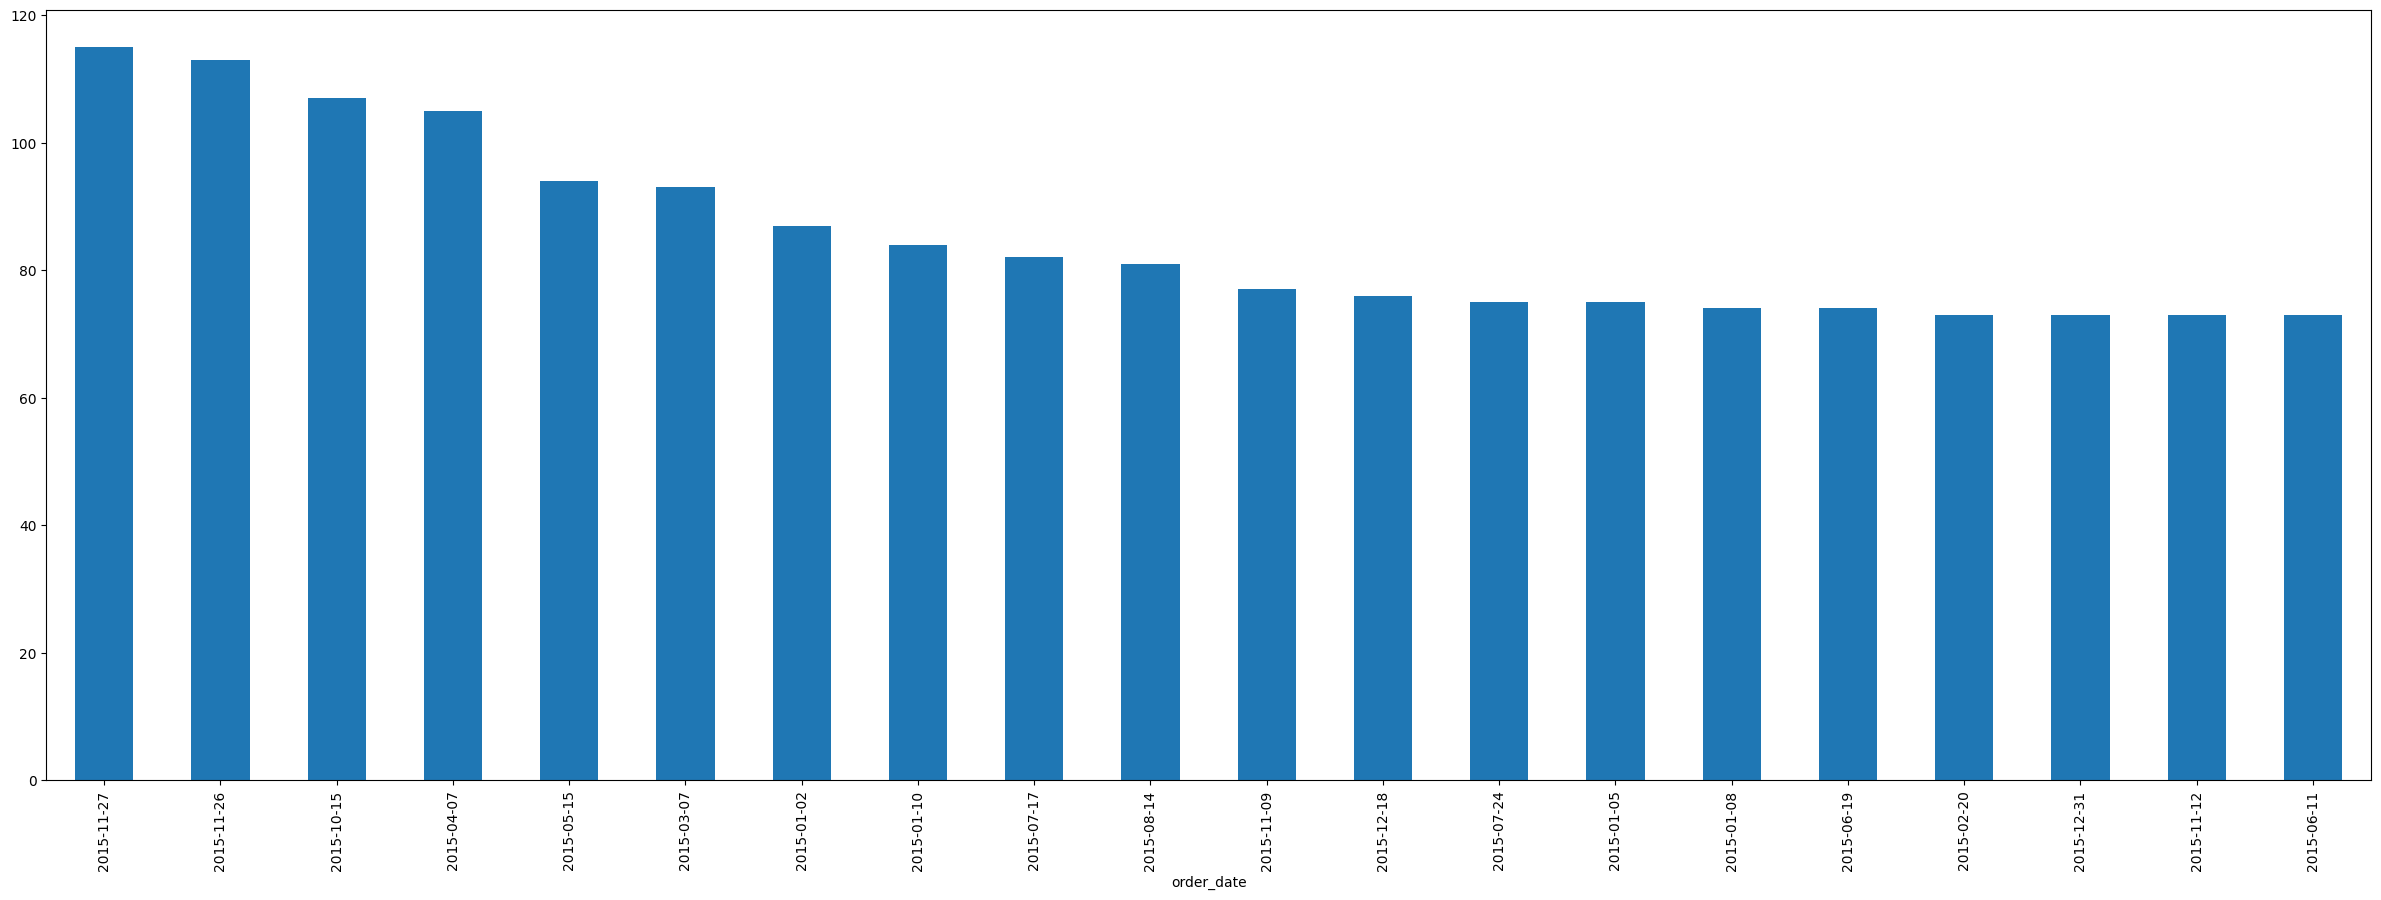

In [ ]:
# top todya days with maximum orders
plt.figure(figsize=(30,10))
daily_orders.sort_values(ascending=False).head(20).plot.bar()
plt.show()

As seen above maximum no. of orders were made on 26th and 27th November i.e. Thanksgiving day

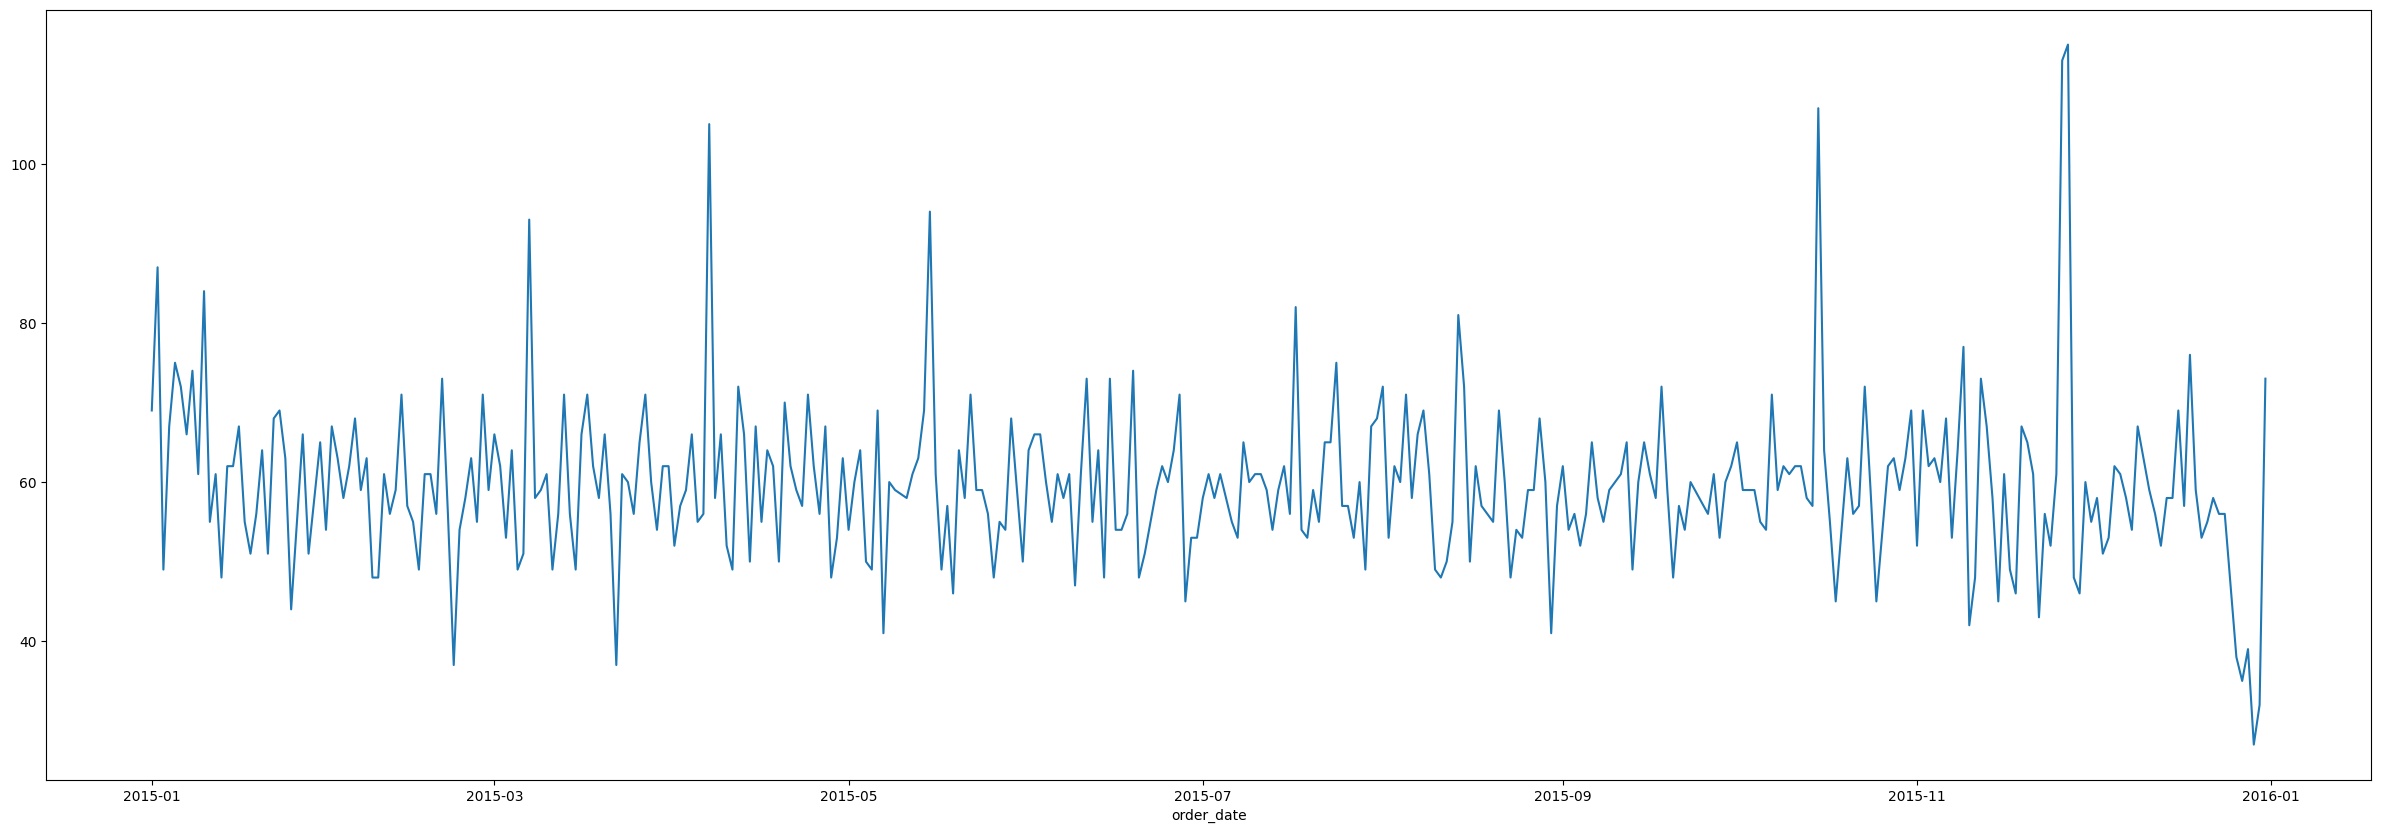

In [ ]:
plt.figure(figsize=(30,10))
daily_orders.plot()
plt.show()

In [ ]:
daily_orders = pd.DataFrame({'No. of orders': daily_orders})
daily_orders=daily_orders.reset_index()

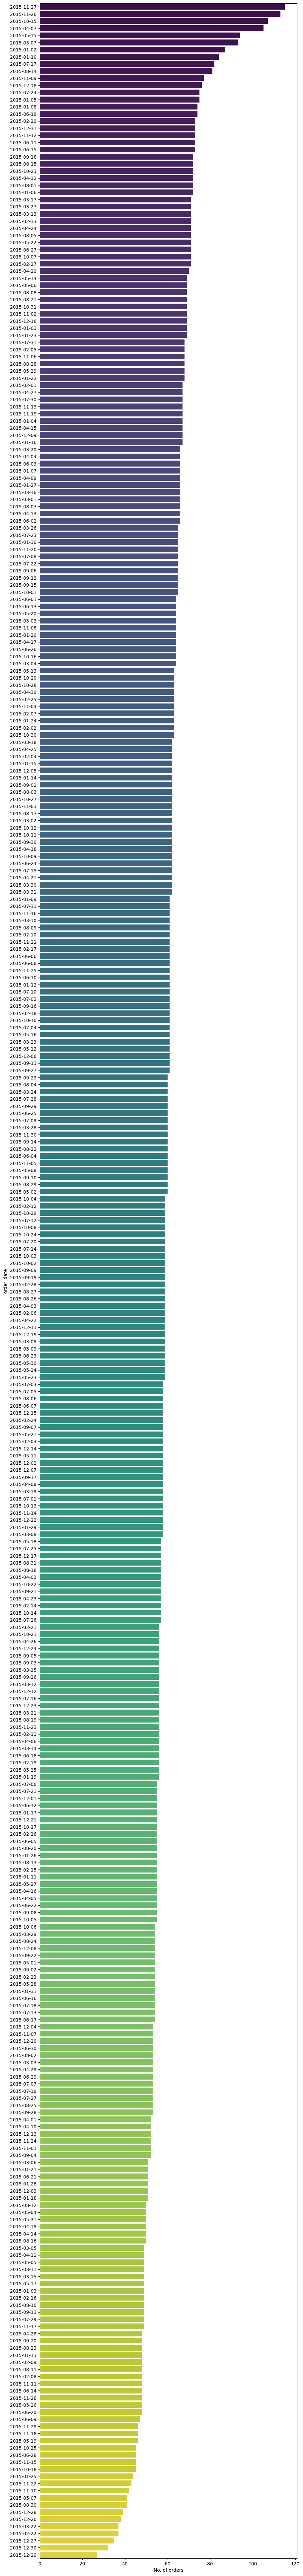

In [ ]:
plt.figure(figsize=(10,100))
sns.barplot(data=daily_orders.sort_values(by='No. of orders', ascending= False), x= 'No. of orders', y='order_date', palette="viridis")
plt.show()

- 26th and 27th Nov, 15th May, 15th October, 7th March, 7th April, are days on which maximum orders are made.
- Least no. of orders were made on 29th, 30th & 27th December i.e. towards end of the year

# No. of Orders on Weekdays and Weekend


In [ ]:
pizza_dt['order_date'] = pd.to_datetime(pizza_dt['order_date'])
#Monday is 0 and Sunday is 6
pizza_dt["Day_index"] = pizza_dt["order_date"].dt.dayofweek

In [ ]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
# Get the corresponding weekday name
pizza_dt["name of day"] = pizza_dt["Day_index"].apply(lambda x:weekday_names[x])

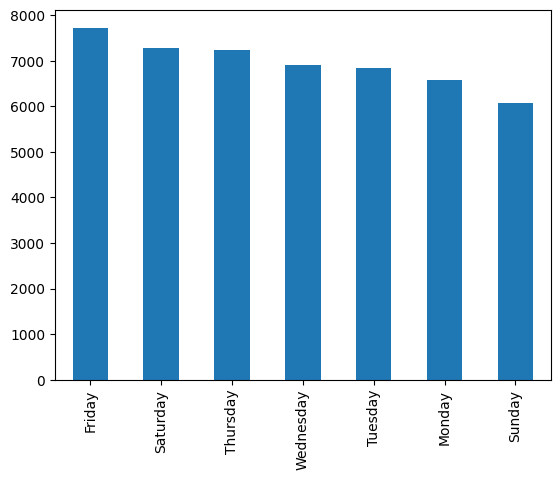

Friday       7723
Saturday     7274
Thursday     7243
Wednesday    6907
Tuesday      6833
Monday       6577
Sunday       6063
Name: name of day, dtype: int64


In [ ]:
pizza_dt["name of day"].value_counts().plot.bar()
plt.show()
print(pizza_dt["name of day"].value_counts())

In [ ]:
(7723-6063)/7723 *100

21.49423799041823

- Maximum orders have been made on Fridays probably TGIF moment :p
- On Sundays no. of orders are  21.5% lower compared to Friday may people do not like to eat on Sundays.



# Lets check Seasonality effect


In [ ]:
pizza_dt["month_no"] = pizza_dt["order_date"].dt.month

In [ ]:
months=['Jan','Feb','March','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

In [ ]:
pizza_dt["month_of year"]=pizza_dt["month_no"].apply(lambda x : months[x-1])

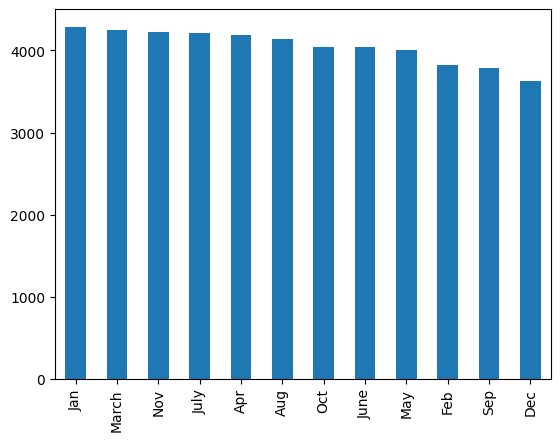

Jan      4288
March    4251
Nov      4226
July     4212
Apr      4182
Aug      4141
Oct      4045
June     4044
May      4008
Feb      3821
Sep      3780
Dec      3622
Name: month_of year, dtype: int64


In [ ]:
pizza_dt["month_of year"].value_counts().plot.bar()
plt.show()
print(pizza_dt["month_of year"].value_counts())

- Maximum demand is in Jan followed by March and November
- Least demand is in December and September

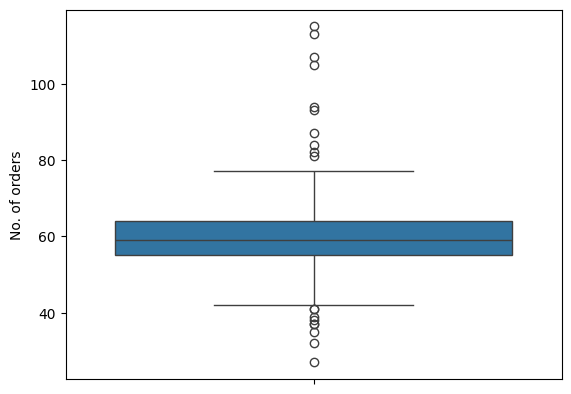

In [ ]:
sns.boxplot(daily_orders['No. of orders'])
plt.show()

In [ ]:
daily_orders['No. of orders'].describe()

count    358.000000
mean      59.636872
std       10.050126
min       27.000000
25%       55.000000
50%       59.000000
75%       64.000000
max      115.000000
Name: No. of orders, dtype: float64

Average No. of orders in a day are 59

In [ ]:
daily_orders['No. of orders'].sum()

21350

Lets see order_time feature

Now time data is having seconds data also so let us remove since it is not that significant in study

In [ ]:
pizza_dt["order_time_mod"]=pizza_dt["order_time"].apply(lambda x:str(x[0:5]))

In [ ]:
pizza_dt["order_time_mod"].head(1)

0    11:38
Name: order_time_mod, dtype: object

In [ ]:
orders_time= pizza_dt.groupby(["order_date","order_time_mod","order_id"]).order_id.count()
orders_time.head()

order_date  order_time_mod  order_id
2015-01-01  11:38           1.0         1
            11:57           2.0         5
            12:12           3.0         2
            12:16           4.0         1
            12:21           5.0         1
Name: order_id, dtype: int64

In [ ]:
orders_time= orders_time.groupby(["order_date","order_time_mod"]).count()
orders_time.head()

order_date  order_time_mod
2015-01-01  11:38             1
            11:57             1
            12:12             1
            12:16             1
            12:21             1
Name: order_id, dtype: int64

In [ ]:
orders_time= pd.DataFrame({"No. of orders":orders_time}).reset_index()

In [ ]:
orders_time.order_time_mod.head()

0    11:38
1    11:57
2    12:12
3    12:16
4    12:21
Name: order_time_mod, dtype: object

We need to treat data as row no. 18425 is havig time format as under

In [ ]:
orders_time.iloc[18425]

order_date        2015-11-24
order_time_mod         9:52:
No. of orders              1
Name: 18425, dtype: object

In [ ]:
orders_time["order_time_mod"].iloc[18425]='09:52'

In [ ]:
orders_time.iloc[18425]

order_date        2015-11-24
order_time_mod         09:52
No. of orders              1
Name: 18425, dtype: object

In [ ]:
orders_time['order_time_mod'] = pd.to_datetime(orders_time['order_time_mod'], format='%H:%M')

In [ ]:
orders_time.head(2)

order_date      order_time_mod  No. of orders
0  2015-01-01 1900-01-01 11:38:00              1
1  2015-01-01 1900-01-01 11:57:00              1

In [ ]:
orders_time['No. of orders'].sum()

21350

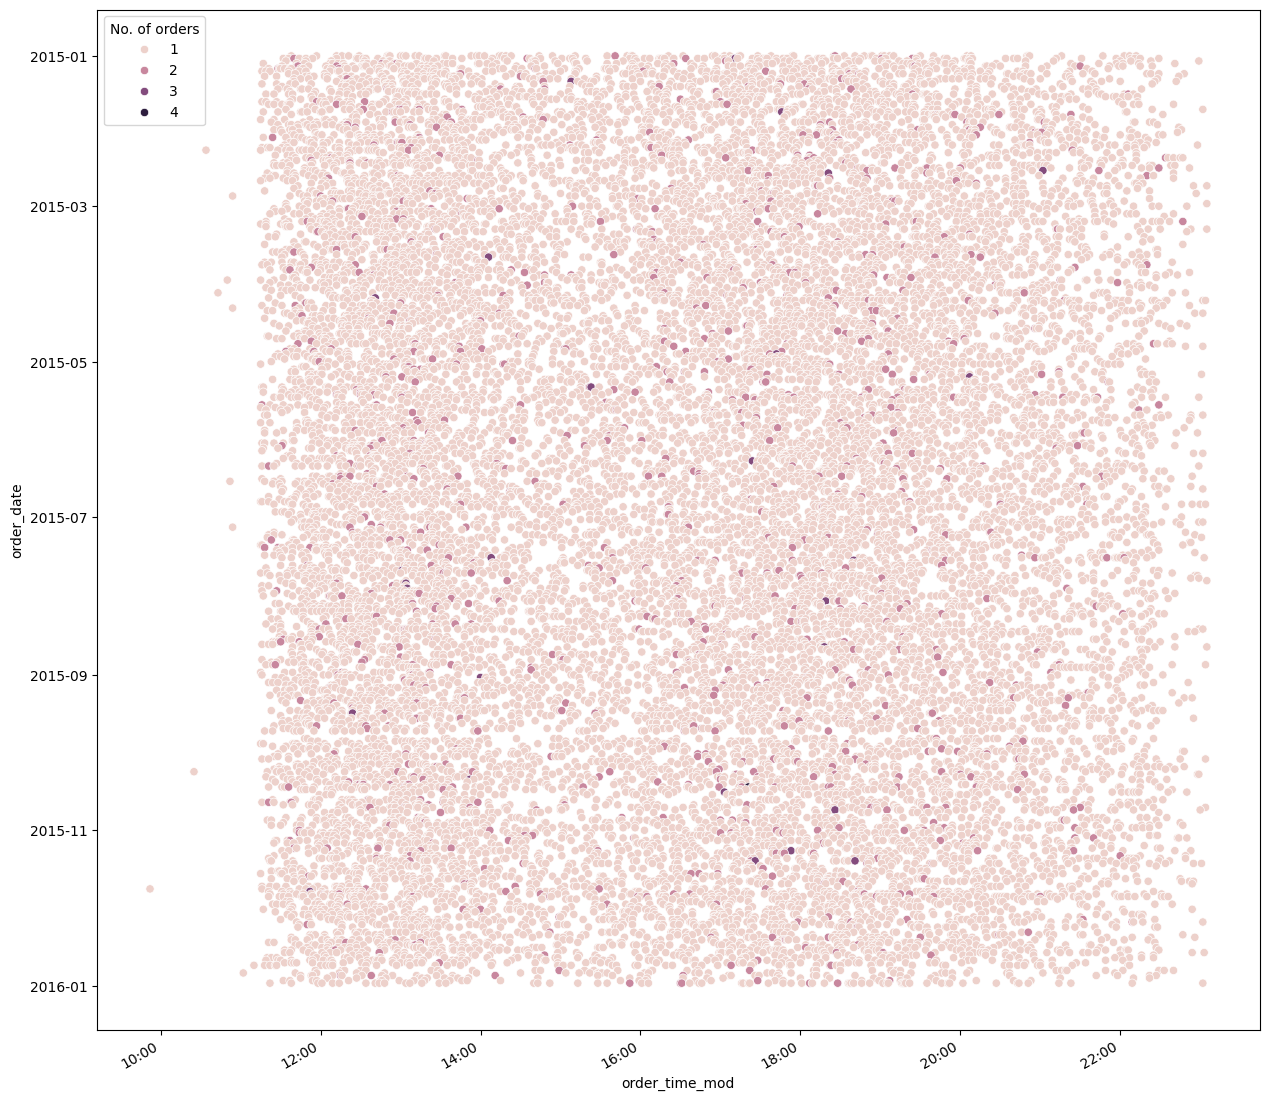

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,15))
sns.scatterplot(data=orders_time, x="order_time_mod",y="order_date",hue="No. of orders", )
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()
plt.show()

With the denseness of the plot, it can be inferred that maximum orders are being made between 11:00 hrs to 14:00 hrs and then 17:00 hrs to 20:00 hrs. So workload is maximum for these hours. For rest of the hrs demand is less. Sometimes store has opened at 10:00 hrs well before normal timing of 11:30 hrs to 2300 hrs
- Note: No. of orders here basically define no. of orders in a particular minute as we have removed seconds columns

In [ ]:
#Let us dig little deeper to get exact times when there is peak demand

In [ ]:
orders_time["order_time_mod"]=pd.to_datetime(orders_time['order_time_mod'], format='%H:%M').dt.time

In [ ]:
orders_time_freq=orders_time["order_time_mod"].value_counts()

In [ ]:
orders_time_freq= pd.DataFrame(orders_time_freq).reset_index()

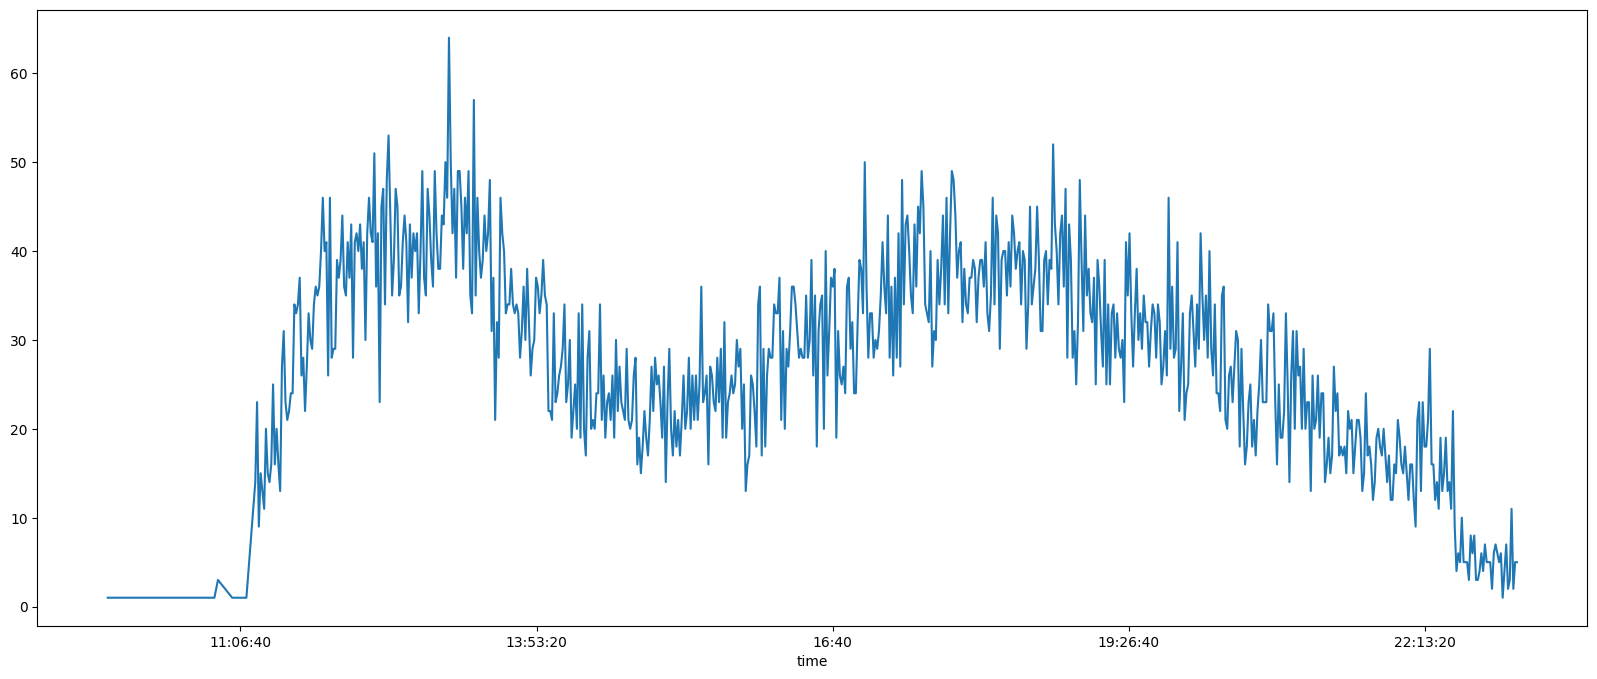

In [ ]:
plt.figure(figsize=(20,8))
orders_time["order_time_mod"].value_counts().plot.line()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#plt.gcf().autofmt_xdate()

# Add more ticks to the x-axis using HourLocator or MinuteLocator
#locator = mdates.HourLocator(interval=1)  # Adjust interval as needed
#plt.gca().xaxis.set_major_locator(locator)
plt.show()

Peak deamnd is first after opening of store and in evening hours. Demand is least 2 PM to 4PM i.e. after lunch hours and late night.

Unit Price

Lets check out unit price of various pizzas

In [ ]:
#Lets whether there is any change in unit price of various pizzas based on their sizes

In [ ]:
pizza_sizes=list(set(pizza_dt.pizza_size.to_list()))
len(pizza_sizes)

5

In [ ]:
pizza_sizes

['M', 'L', 'XXL', 'S', 'XL']

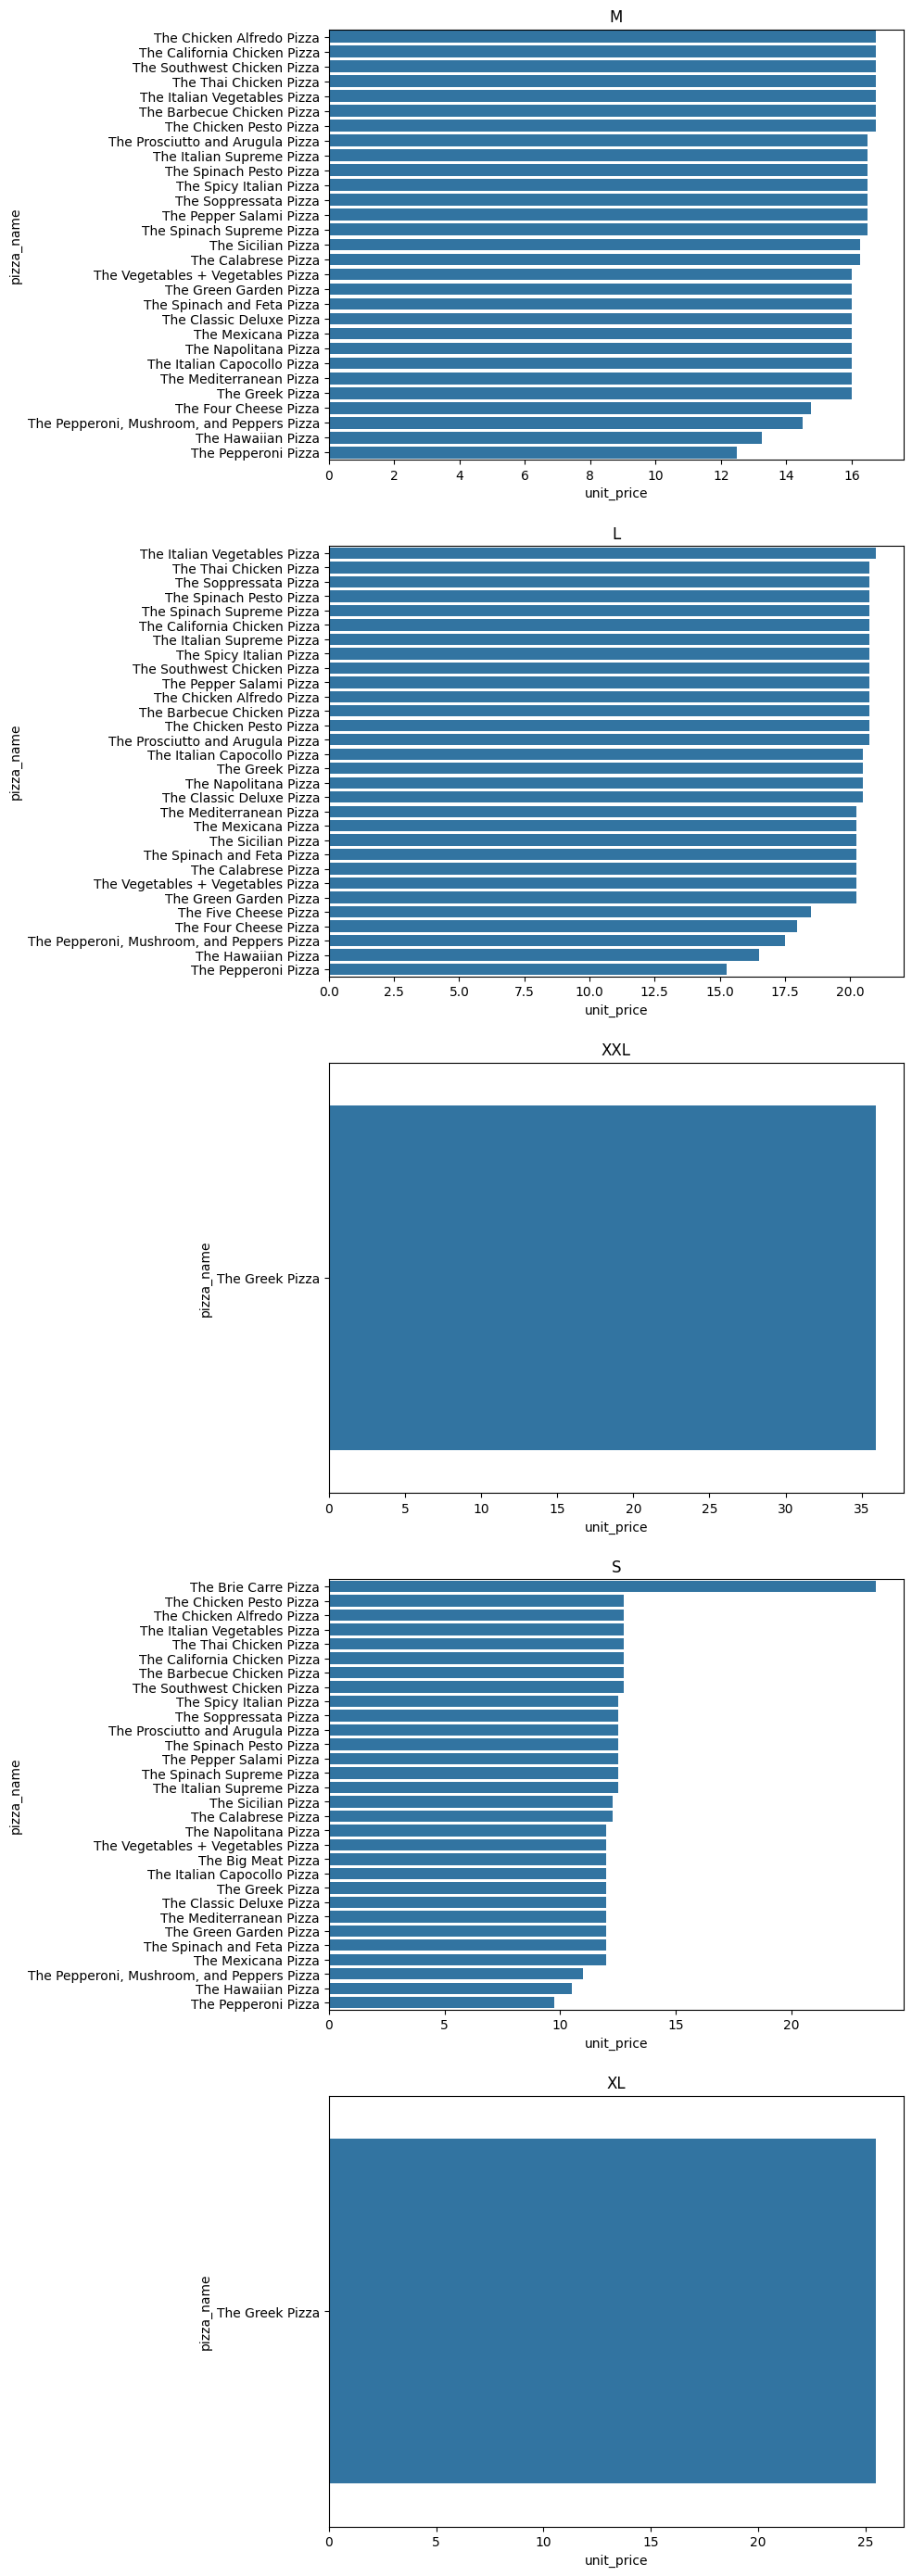

In [ ]:
plt.subplots(figsize=(8,35))
i=1
for pizza_size in pizza_sizes:
    plt.subplot(5,1,i)
    sns.barplot(data=pizza_dt[pizza_dt['pizza_size']== pizza_size].sort_values(by ="unit_price", ascending =False),
                x='unit_price', y="pizza_name", color = '#E96479')
    plt.title(pizza_size)
    i+=1

Most expensive pizza is The Brie Carre Pizza and cheapest pizza is The Big meat pizza.

Lets first check pizzas which are contributing maximum to Pizza sales


In [ ]:
#Sanity check
(pizza_dt['total_price'] == pizza_dt['unit_price']*pizza_dt['quantity']).value_counts()

True    48620
dtype: int64

So there is no issues with quantity, unit price and total price data

In [ ]:
#Lets check out pizzas with maximum contribution to maximum gross sales

In [ ]:
gross_price=pd.DataFrame(pizza_dt.groupby(["pizza_name_id","pizza_name","pizza_size","unit_price"]).\
                         agg({'total_price': 'sum', 'quantity': 'sum'})).reset_index().sort_values(by="total_price", ascending =False)

In [ ]:
gross_price.tail()

pizza_name_id                 pizza_name pizza_size  unit_price  \
43      mexicana_s         The Mexicana Pizza          S       12.00   
23  green_garden_l     The Green Garden Pizza          L       20.25   
13   ckn_alfredo_s  The Chicken Alfredo Pizza          S       12.75   
7      calabrese_s        The Calabrese Pizza          S       12.25   
87   the_greek_xxl            The Greek Pizza        XXL       35.95   

    total_price  quantity  
43      1944.00     162.0  
23      1923.75      95.0  
13      1224.00      96.0  
7       1212.75      99.0  
87      1006.60      28.0

So Large Thai Chicken Pizza is contributing maximum to sales and
XXL The greek Pizza is contributing minimum to sales.

Lets see whether cost of pizza has anything to do with Sales. Because ultimate aim is to increase sales. For that we will plot bubble chart

In [ ]:
import plotly.express as px

In [ ]:
df = gross_price
fig = px.scatter(df, x="total_price", y="unit_price", size="total_price", color="pizza_name_id",
                 hover_name="total_price", log_x=False, size_max=30)
fig.show()

In [ ]:
df = gross_price
fig = px.scatter(df, x="total_price", y="quantity", size="total_price", color="pizza_name_id",
                 hover_name="total_price", log_x=False, size_max=30)
fig.show()

In [ ]:
df = gross_price
fig = px.scatter(df, x="unit_price", y="quantity", size="unit_price", color="pizza_name_id",
                 hover_name="unit_price", log_x=False, size_max=30)
fig.show()

In [ ]:
pizza_dt.head(1)

order_id pizza_name_id  quantity  order_date order_time  unit_price  \
0       1.0    hawaiian_m       1.0  2015-01-01   11:38:36       13.25   

   total_price pizza_size pizza_category  \
0        13.25          M        Classic   

                          pizza_ingredients          pizza_name order_time_mod  
0  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza          11:38

In [ ]:
ingredient_pizza=pizza_dt.pizza_ingredients.to_list()

In [ ]:
len(set(ingredient_pizza))

32

There are 32 no. of unique ingredients in Pizza

#How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

Considering the following (in avg there are 4 chairs in a table):

1 small pizza= 1/4 table for 1 hr
1 medium/ larrge sized pizza = 1/2 table for 1 hr
1 XL/XXL pizza = 1 table for 1 hr

https://www.kaggle.com/code/roshniranjita24/pizza-restaurant-sales/notebook#Q5-How-well-are-we-utilizing-our-seating-capacity?-(we-have-15-tables-and-60-seats)

In [ ]:
conditions = [
    (pizza_dt['pizza_size'] =='S'),
    (pizza_dt['pizza_size'] =='M') | (pizza_dt['pizza_size']== 'L'),
    (pizza_dt['pizza_size']== 'XL') | (pizza_dt['pizza_size']== 'XXL'),
]

values = [0.25, 0.50, 1]

pizza_dt['Utilization'] = np.select(conditions, values)
pizza_dt['Total_Util'] = pizza_dt['Utilization']* pizza_dt['quantity']
#pizza_sales

day_hourly= pizza_dt.groupby(['order_date','Day_of_week','Day_of_week_no','Month', 'Month_no', 'Hour'])['Total_Util'].sum().reset_index().sort_values(['order_date','Hour'])
day_hourly['PCT_util']= day_hourly['Total_Util']*100/15
day_hourly

In [ ]:
day_hourly['PCT_util'].hist()
plt.show()